# Setting up

In [ ]:
# For Google Colab
# !pip install quickdraw ipyplot plotly

In [1]:
from quickdraw_preprocess import *
import tensorflow as tf

number_of_names = 30
number_of_drawings = max_drawings

# Creating and preprocessing dataset

loading chair drawings
load complete


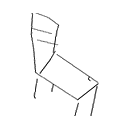

In [2]:
random_image = random_image(1)
random_image_array = preprocess_image(random_image)
unprocess_array(random_image_array)

In [3]:
random_names = random_names(number_of_names, seed = 3) # 2
random_names

['flower',
 'teapot',
 'spreadsheet',
 'cell phone',
 'motorbike',
 'The Eiffel Tower',
 'rhinoceros',
 'tractor',
 'sweater',
 'blackberry',
 'The Great Wall of China',
 'ant',
 'rake',
 'grapes',
 'stairs',
 'flip flops',
 'drums',
 'rake',
 'spider',
 'squirrel',
 'rifle',
 'oven',
 'trumpet',
 'computer',
 'flashlight',
 'trombone',
 'computer',
 'smiley face',
 'ocean',
 'anvil']

In [4]:
random_names_image_dict = image_dict_names(random_names)
random_names_image_dict

loading flower drawings
load complete
loading teapot drawings
load complete
loading spreadsheet drawings
load complete
loading cell phone drawings
load complete
loading motorbike drawings
load complete
loading The Eiffel Tower drawings
load complete
loading rhinoceros drawings
load complete
loading tractor drawings
load complete
loading sweater drawings
load complete
loading blackberry drawings
load complete
loading The Great Wall of China drawings
load complete
loading ant drawings
load complete
loading rake drawings
load complete
loading grapes drawings
load complete
loading stairs drawings
load complete
loading flip flops drawings
load complete
loading drums drawings
load complete
loading spider drawings
load complete
loading squirrel drawings
load complete
loading rifle drawings
load complete
loading oven drawings
load complete
loading trumpet drawings
load complete
loading computer drawings
load complete
loading flashlight drawings
load complete
loading trombone drawings
load comp

{'flower': [<quickdraw.data.QuickDrawing at 0x178b0376f10>,
 'teapot': [<quickdraw.data.QuickDrawing at 0x178b03c66d0>,
 'spreadsheet': [<quickdraw.data.QuickDrawing at 0x178b04a73d0>,
 'cell phone': [<quickdraw.data.QuickDrawing at 0x178b050b460>,
 'motorbike': [<quickdraw.data.QuickDrawing at 0x178b057d490>,
 'The Eiffel Tower': [<quickdraw.data.QuickDrawing at 0x178b05b3b20>,
 'rhinoceros': [<quickdraw.data.QuickDrawing at 0x178b064a0d0>,
 'tractor': [<quickdraw.data.QuickDrawing at 0x178b06bd8b0>,
 'sweater': [<quickdraw.data.QuickDrawing at 0x178b0747400>,
 'blackberry': [<quickdraw.data.QuickDrawing at 0x178b07c9fa0>,
 'The Great Wall of China': [<quickdraw.data.QuickDrawing at 0x178b07c94f0>,
 'ant': [<quickdraw.data.QuickDrawing at 0x178b08ddc10>,
 'rake': [<quickdraw.data.QuickDrawing at 0x178b0b60a00>,
 'grapes': [<quickdraw.data.QuickDrawing at 0x178b09c8af0>,
 'stairs': [<quickdraw.data.QuickDrawing at 0x178b0a59070>,
 'flip flops': [<quickdraw.data.QuickDrawing at 0x178b0a

In [ ]:
plot_image_dict_tabs(random_names_image_dict)

In [ ]:
examples, labels = preprocess_image_dict_to_arrays(random_names_image_dict)
dict(zip(labels, examples))

In [ ]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
transfomed_labels = encoder.fit_transform(labels)
transfomed_labels

In [ ]:
ipyplot.plot_class_tabs(images = examples, labels = labels, max_imgs_per_tab = 6, img_width = 128)

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((examples, transfomed_labels))
dataset

In [ ]:
dataset = dataset.shuffle(buffer_size = number_of_names * number_of_drawings)
dataset = dataset.repeat(500).batch(32)
dataset

In [ ]:
dataset_iterator = dataset.as_numpy_iterator()
dataset_iterator

In [ ]:
batch = dataset_iterator.next()
batch

In [ ]:
ipyplot.plot_images(images = batch[0], labels = batch[1], max_images = 6, img_width = 128)

# Splitting dataset

In [ ]:
train_size = int(len(dataset) * 0.7)
val_size = int(len(dataset) * 0.15)
test_size = int(len(dataset) * 0.15)
if train_size + val_size + test_size != len(dataset):
    train_size += len(dataset) - (train_size + val_size + test_size)

In [ ]:
train_size, val_size, test_size, train_size + val_size + test_size, len(dataset)

In [ ]:
train_data = dataset.take(train_size)
val_data = dataset.skip(train_size).take(val_size)
test_data = dataset.skip(train_size + val_size).take(test_size)

# Training CNN

## Build model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3, 3), 1, activation = 'relu', input_shape = (*resize_size, 1)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), 1, activation = 'relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3, 3), 1, activation = 'relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(resize_size[0], activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(number_of_names, activation = 'softmax'))

In [ ]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [ ]:
model.summary()

## Train model

In [ ]:
import os

log_dir = 'logs'

if not os.path.exists(log_dir):
        os.mkdir(log_dir)

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir, histogram_freq = 1)

In [ ]:
train_data

In [ ]:
history = model.fit(train_data, epochs = 20, validation_data = val_data, callbacks = [tensorboard_callback])

## Plot performance

In [ ]:
history.history

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs = [[{'secondary_y': True}]])

# Add traces
fig.add_trace(
    go.Scatter(y = history.history['val_loss'], name = 'val_loss'),
    secondary_y = False
)

fig.add_trace(
    go.Scatter(y = history.history['loss'], name = 'loss'),
    secondary_y = False
)

fig.add_trace(
    go.Scatter(y = history.history['val_accuracy'], name = 'val accuracy'),
    secondary_y = True
)

fig.add_trace(
    go.Scatter( y=history.history['accuracy'], name = 'val accuracy'),
    secondary_y = True
)

# Add figure title
fig.update_layout(
    title_text = 'Loss / Accuracy of CNN Model'
)

# Set x-axis title
fig.update_xaxes(title_text = 'Epoch')

# Evaluating model

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [ ]:
for batch in test_data.as_numpy_iterator():
    x, y = batch
    yhat = model.predict(x)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

In [ ]:
f'Precision: {precision.result().numpy()}, Recall: {recall.result().numpy()}, Accuracy: {accuracy.result().numpy()}'

# Testing model

In [ ]:
def decode(yhat):
    decoded_predictions = []
    for i in range(len(yhat[0])):
        array = np.zeros(len(yhat[0]))
        array[i] = 1
        label = encoder.inverse_transform(np.expand_dims(array, 0))[0]
        decoded_predictions.append((label, yhat[0][i] * 100))

    text = ''
    for pred in decoded_predictions:
        text += '{}: {:.2f}%'.format(pred[0], pred[1]) + '\n'
    return text

In [ ]:
random_name = np.random.choice(random_names)
random_image = qd.get_drawing(random_name)
plot_image(random_image)

In [ ]:
yhat = model.predict(np.expand_dims(preprocess_image(random_image), 0))
decoded_labels = encoder.inverse_transform(yhat)
if decoded_labels[0] == random_name:
    print(f'Success! It is a {random_name}.')
else:
    print(f'Unlucky! It was a {random_name}.')
print(decode(yhat))

# Save and load model

In [ ]:
model_dir = 'models'

if not os.path.exists(model_dir):
        os.mkdir(model_dir)

In [ ]:
# model.save(os.path.join('models','cnn_model_2.h5'))

In [ ]:
from tensorflow.keras.models import load_model

new_model = load_model('models/cnn_model_2.h5')

In [ ]:
random_name = np.random.choice(random_names)
random_image = qd.get_drawing(random_name)
random_image.image

In [ ]:
yhat = new_model.predict(np.expand_dims(preprocess_image(random_image), 0))
decoded_labels = encoder.inverse_transform(yhat)
if decoded_labels[0] == random_name:
    print(f'Success! It is a {random_name}.')
else:
    print(f'Unlucky! It was a {random_name}.')
print(decode(yhat))